# Determining Streaming Rates of Music with Lyrics versus Music without Lyrics

In [62]:
# import dependencies
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from textwrap import wrap

In [2]:
# set base path to csvs
csv_base_path = "../../Data_Files/Play_Lists/"

# import csvs as dataframes
are_and_be = pd.read_csv(csv_base_path + "are_and_be.csv")
fresh_finds = pd.read_csv(csv_base_path + "fresh_finds.csv")
global_top_50 = pd.read_csv(csv_base_path + "global_top_50.csv")
global_viral_50 = pd.read_csv(csv_base_path + "global_viral_50.csv")
hot_country = pd.read_csv(csv_base_path + "hot_country.csv")
mint = pd.read_csv(csv_base_path + "mint.csv")
new_music_friday_malaysia = pd.read_csv(csv_base_path + "new_music_friday_malaysia.csv")
rap_caviar = pd.read_csv(csv_base_path + "rap_caviar.csv")
rock_this = pd.read_csv(csv_base_path + "rock_this.csv")
todays_top_hits = pd.read_csv(csv_base_path + "todays_top_hits.csv")
united_states_top_50 = pd.read_csv(csv_base_path + "united_states_top_50.csv")
united_states_viral_50 = pd.read_csv(csv_base_path + "united_states_viral_50.csv")
viral_hits = pd.read_csv(csv_base_path + "viral_hits.csv")
viva_latino = pd.read_csv(csv_base_path + "viva_latino.csv")

# store all dataframes in a list
dataframes = [are_and_be, fresh_finds, global_top_50, global_viral_50, 
                  hot_country, mint, new_music_friday_malaysia, rap_caviar, 
                  rock_this, todays_top_hits, united_states_top_50, united_states_viral_50, 
                  viral_hits, viva_latino]

## Overall Results

In [43]:
# store all songs in one dataframe
overall_dataframe = pd.DataFrame()

for dataframe in dataframes:
    overall_dataframe = overall_dataframe.append(dataframe)

# iterate through all rows and rate the song as lyric vs. no lyric if instrumentalness
# is > 0.4
overall_dataframe["No Lyrics?"] = ""
overall_dataframe.loc[overall_dataframe["Instrumentalness"] > 0.4, "No Lyrics?"] = "No Lyrics"
overall_dataframe.loc[overall_dataframe["Instrumentalness"] <= 0.4, "No Lyrics?"] = "Lyrics"

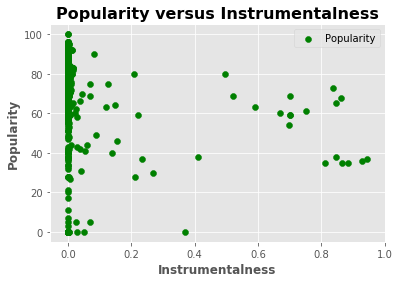

In [70]:
# According to Spotify API the closer a track is to "Instrumentalness" = 1 
# the greater likelihood that the song does not have lyrics
plt.style.use('ggplot')

# plot all songs on instrumentalness versus popularity
plt.scatter(overall_dataframe["Instrumentalness"], overall_dataframe["Popularity"], 
            color = "green")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
# Save our graph and show the graph
plt.savefig("../Images/popularity_vs_instrument_scatter.png", bbox_inches = 'tight')
plt.show()

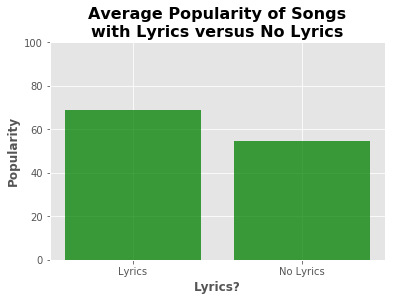

F_onewayResult(statistic=5.997252525950462, pvalue=0.01458143940410844)

In [69]:
# plot average popularity of music with lyrics versus music without lyrics
plt.style.use('ggplot')

# store bars to compare in lists
lyric_list = ["Lyrics", "No Lyrics"]
lyric_df = overall_dataframe.loc[overall_dataframe["No Lyrics?"] == "Lyrics", :]["Popularity"]
no_lyric_df = overall_dataframe.loc[overall_dataframe["No Lyrics?"] == "No Lyrics", :]["Popularity"]
lyric_values = [lyric_df.mean(),
               no_lyric_df.mean()]
x_axis = np.arange(len(lyric_values))
tick_locations = [value for value in x_axis]

# plot bars
plt.bar(x_axis, lyric_values, color='green', alpha=0.75, align="center")
plt.xticks(tick_locations, lyric_list)
plt.title("\n".join(wrap("Average Popularity of Songs with Lyrics versus No Lyrics", 30)), 
          fontsize=16, fontweight="bold")

plt.xlabel("Lyrics?", fontsize=12, fontweight="bold")
plt.ylabel("Popularity", fontsize=12, fontweight="bold")
plt.ylim(0, 100)

# Save our graph and show the graph
plt.savefig("../Images/average_popularity_lyrics_no_lyrics.png", bbox_inches = 'tight')
plt.show()

# perform ANOVA to determine if two sample means are statistically significant
stats.f_oneway(lyric_df, no_lyric_df)

In [66]:
# plot count of songs in different popularity bands within Lyrics vs. No Lyrics buckets
# Create the bins in which Data will be held
# Bins are 0, 20, 40, 60, 80, 90, 100
popularity_bins = [0, 20, 40, 60, 80, 90, 100]

# Create the names for the four bins
popularity_group_names = ["Very Low Popularity", "Low Popularity", "Moderate Popularity", 
               "High Popularity", "Very High Popularity", "Platinum Record"]

# bin all of the songs based on popularity
overall_dataframe["Popularity Category"] = pd.cut(overall_dataframe["Popularity"], 
                                                  popularity_bins, labels=popularity_group_names)

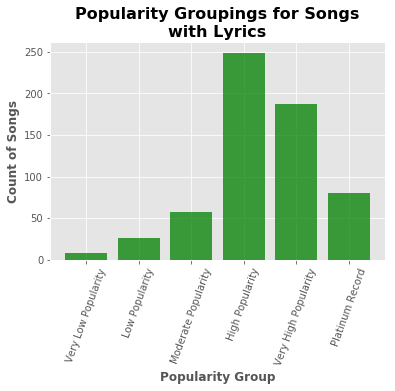

In [68]:
# for "Lyrics" songs plot graph of counts of different song popularity buckets
plt.style.use('ggplot')

# store bars to compare in lists
lyric_vlp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Very Low Popularity"), :]["Popularity Category"]

lyric_lp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Low Popularity"), :]["Popularity Category"]

lyric_mp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Moderate Popularity"), :]["Popularity Category"]

lyric_hp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "High Popularity"), :]["Popularity Category"]

lyric_vhp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Very High Popularity"), :]["Popularity Category"]

lyric_pr_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Platinum Record"), :]["Popularity Category"]

lyric_pop_values = [lyric_vlp_df.count(), lyric_lp_df.count(), lyric_mp_df.count(),
               lyric_hp_df.count(), lyric_vhp_df.count(), lyric_pr_df.count()]
lyric_pop_x_axis = np.arange(len(lyric_pop_values))
lyric_pop_tick_locations = [value for value in lyric_pop_x_axis]

# plot bars
plt.bar(lyric_pop_x_axis, lyric_pop_values, color='green', alpha=0.75, align="center")
plt.xticks(lyric_pop_tick_locations, popularity_group_names, rotation=70)
plt.title("\n".join(wrap("Popularity Groupings for Songs with Lyrics", 30)), 
          fontsize=16, fontweight="bold")
plt.xlabel("Popularity Group", fontsize=12, fontweight="bold")
plt.ylabel("Count of Songs", fontsize=12, fontweight="bold")
plt.tight_layout

# Save our graph and show the graph
plt.savefig("../Images/popularity_groupings_lyrics.png", bbox_inches = 'tight')
plt.show()

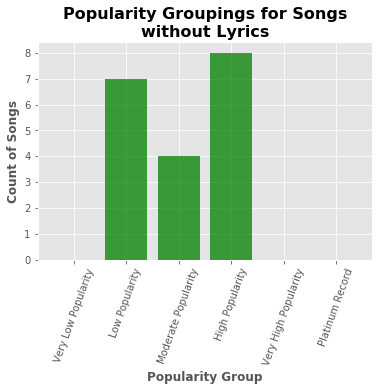

In [71]:
# for "No Lyrics" songs plot graph of counts of different song popularity buckets
plt.style.use('ggplot')

# store bars to compare in lists
no_lyric_vlp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "No Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Very Low Popularity"), :]["Popularity Category"]

no_lyric_lp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "No Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Low Popularity"), :]["Popularity Category"]

no_lyric_mp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "No Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Moderate Popularity"), :]["Popularity Category"]

no_lyric_hp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "No Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "High Popularity"), :]["Popularity Category"]

no_lyric_vhp_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "No Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Very High Popularity"), :]["Popularity Category"]

no_lyric_pr_df = overall_dataframe.loc[(overall_dataframe["No Lyrics?"] == "No Lyrics") & 
                                     (overall_dataframe["Popularity Category"] == "Platinum Record"), :]["Popularity Category"]

no_lyric_pop_values = [no_lyric_vlp_df.count(), no_lyric_lp_df.count(), no_lyric_mp_df.count(),
               no_lyric_hp_df.count(), no_lyric_vhp_df.count(), no_lyric_pr_df.count()]
no_lyric_pop_x_axis = np.arange(len(no_lyric_pop_values))
no_lyric_pop_tick_locations = [value for value in no_lyric_pop_x_axis]

# plot bars
plt.bar(no_lyric_pop_x_axis, no_lyric_pop_values, color='green', alpha=0.75, align="center")
plt.xticks(no_lyric_pop_tick_locations, popularity_group_names, rotation=70)
plt.title("\n".join(wrap("Popularity Groupings for Songs without Lyrics", 30)), 
          fontsize=16, fontweight="bold")
plt.xlabel("Popularity Group", fontsize=12, fontweight="bold")
plt.ylabel("Count of Songs", fontsize=12, fontweight="bold")
plt.tight_layout

# Save our graph and show the graph
plt.savefig("../Images/popularity_groupings_no_lyrics.png", bbox_inches = 'tight')
plt.show()

## Individual Playlist Results

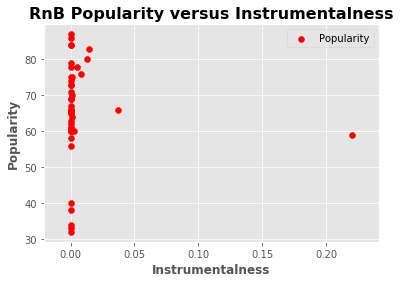

In [6]:
# plot popularity versus instrumentalness for each playlist
plt.style.use('ggplot')

# R'n'B plot (popularity versus instrumentalness)
plt.scatter(are_and_be["Instrumentalness"], are_and_be["Popularity"], color = "Red")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('RnB Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

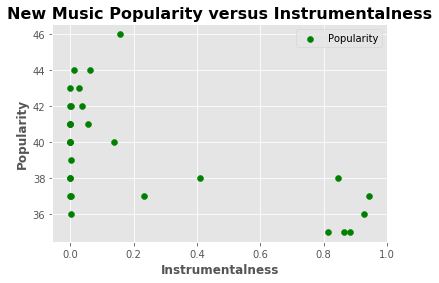

In [7]:
plt.style.use('ggplot')

# New music plot (popularity versus instrumentalness)
plt.scatter(fresh_finds["Instrumentalness"], fresh_finds["Popularity"], color = "Green")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('New Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

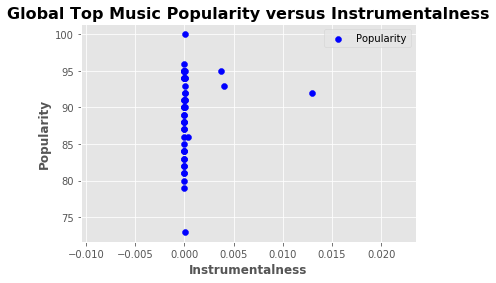

In [8]:
plt.style.use('ggplot')

# Global top music plot (popularity versus instrumentalness)
plt.scatter(global_top_50["Instrumentalness"], global_top_50["Popularity"], color = "Blue")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Global Top Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

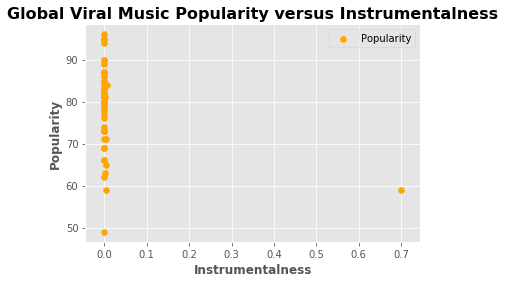

In [9]:
plt.style.use('ggplot')

# Global viral music plot (popularity versus instrumentalness)
plt.scatter(global_viral_50["Instrumentalness"], global_viral_50["Popularity"], color = "Orange")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Global Viral Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

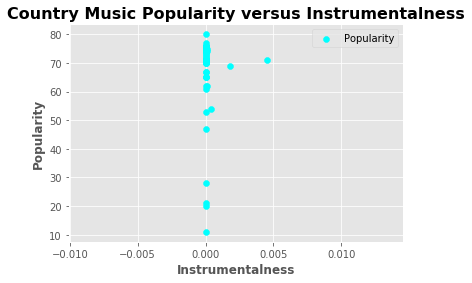

In [10]:
plt.style.use('ggplot')

# Country music plot (popularity versus instrumentalness)
plt.scatter(hot_country["Instrumentalness"], hot_country["Popularity"], color = "Cyan")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Country Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

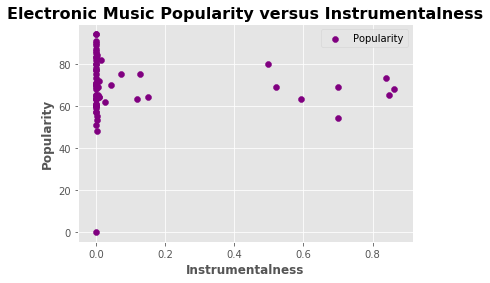

In [11]:
plt.style.use('ggplot')

# Electronic music plot (popularity versus instrumentalness)
plt.scatter(mint["Instrumentalness"], mint["Popularity"], color = "Purple")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Electronic Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

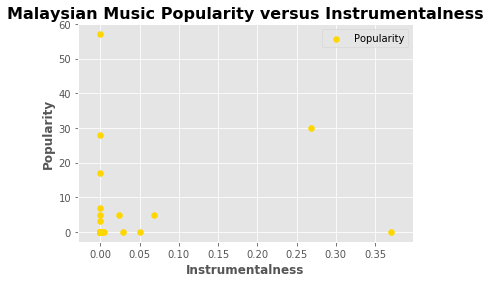

In [12]:
plt.style.use('ggplot')

# Malaysian music plot (popularity versus instrumentalness)
plt.scatter(new_music_friday_malaysia["Instrumentalness"], 
            new_music_friday_malaysia["Popularity"], color = "Gold")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Malaysian Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

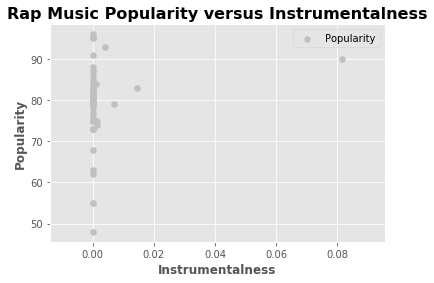

In [13]:
plt.style.use('ggplot')

# Rap music plot (popularity versus instrumentalness)
plt.scatter(rap_caviar["Instrumentalness"], 
            rap_caviar["Popularity"], color = "Silver")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Rap Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

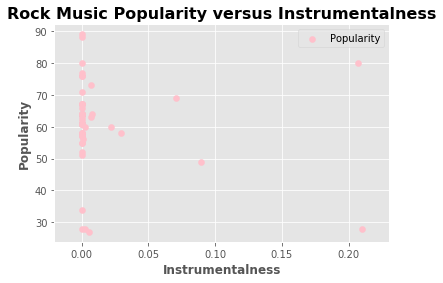

In [14]:
plt.style.use('ggplot')

# Rock music plot (popularity versus instrumentalness)
plt.scatter(rock_this["Instrumentalness"], 
            rock_this["Popularity"], color = "Pink")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Rock Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

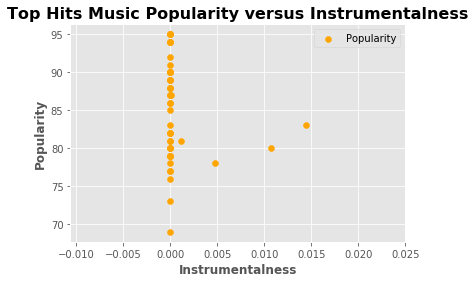

In [15]:
plt.style.use('ggplot')

# Top music plot (popularity versus instrumentalness)
plt.scatter(todays_top_hits["Instrumentalness"], 
            todays_top_hits["Popularity"], color = "Orange")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Top Hits Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

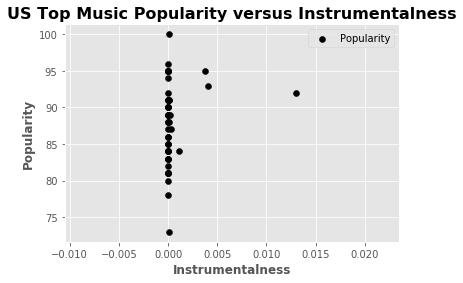

In [16]:
plt.style.use('ggplot')

# US Top music plot (popularity versus instrumentalness)
plt.scatter(united_states_top_50["Instrumentalness"], 
            united_states_top_50["Popularity"], color = "Black")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('US Top Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

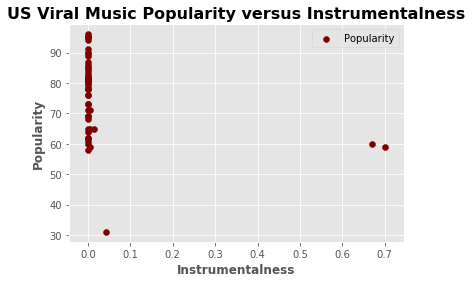

In [17]:
plt.style.use('ggplot')

# US Viral music plot (popularity versus instrumentalness)
plt.scatter(united_states_viral_50["Instrumentalness"], 
            united_states_viral_50["Popularity"], color = "Maroon")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('US Viral Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

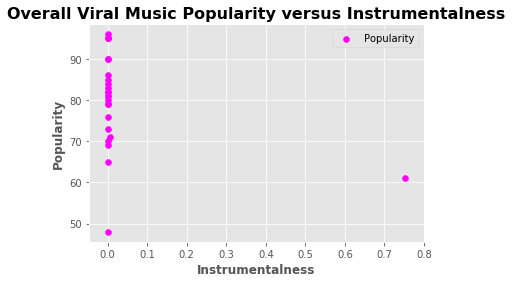

In [18]:
plt.style.use('ggplot')

# Overall Viral music plot (popularity versus instrumentalness)
plt.scatter(viral_hits["Instrumentalness"], 
            viral_hits["Popularity"], color = "Magenta")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Overall Viral Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()

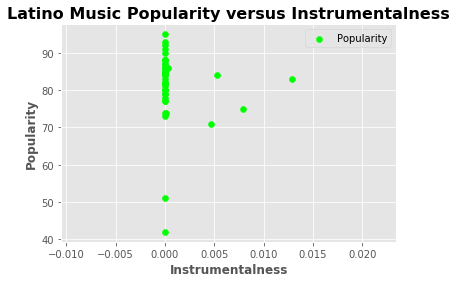

In [19]:
plt.style.use('ggplot')

# Latino music plot (popularity versus instrumentalness)
plt.scatter(viva_latino["Instrumentalness"], 
            viva_latino["Popularity"], color = "Lime")

# set x and y axis labels
plt.xlabel('Instrumentalness', fontsize=12, fontweight="bold")
plt.ylabel('Popularity', fontsize=12, fontweight="bold")

# give the graph a title and legend
plt.title('Latino Music Popularity versus Instrumentalness', fontsize=16, fontweight="bold")
plt.legend(loc="best", fancybox=True)
plt.show()